### Hazırlayan : Sine Gökhan
### Proje : Kredi Kartı Dolandırıcılık Tespiti
### Email : sineegkhnn@gmail.com

**KÜTÜPHANELERİN YÜKLENMESİ:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

**VERİNİN OKUNMASI :**

In [2]:
data=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**BOŞ DEĞERLER:**

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**BU VERİ SETİNDE HİÇ BOŞ DEĞER OLMADIĞINI GÖRÜYORUZ.**

In [ ]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Bu verilerle ilgili fark edeceğiniz en önemli şey, veri kümesinin bir özelliğe göre dengesiz olmasıdır. Bu nedenle, veri kümelerimize ait işlemlerin çoğunluğunun normal olduğunu ve işlemlerin yalnızca birkaç yüzdesinin hileli olduğunu görebiliyoruz.

<img src="https://miro.medium.com/max/524/1*RiZkT25DNE8o1-Mo3gtAuw.png" />

**VERİ HAKKINDA BİLGİLERE GÖZ ATALIM**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344


In [7]:
data.shape

(284807, 31)

**GÖRÜYORUZ Kİ 284807 SATIR VE 31 SÜTUN VAR.**

In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**DOLANDIRICILIK VERİLERİ VE GERÇEK VERİLER**

In [9]:
fraud_cases=len(data[data['Class']==1])

In [ ]:
print('Dolandırıcılık Verileri Sayısı:',fraud_cases)

In [11]:
non_fraud_cases=len(data[data['Class']==0])

In [ ]:
print('Dolandırıcılık Verileri Sayısı:',non_fraud_cases)

In [13]:
fraud=data[data['Class']==1]

In [14]:
genuine=data[data['Class']==0]

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

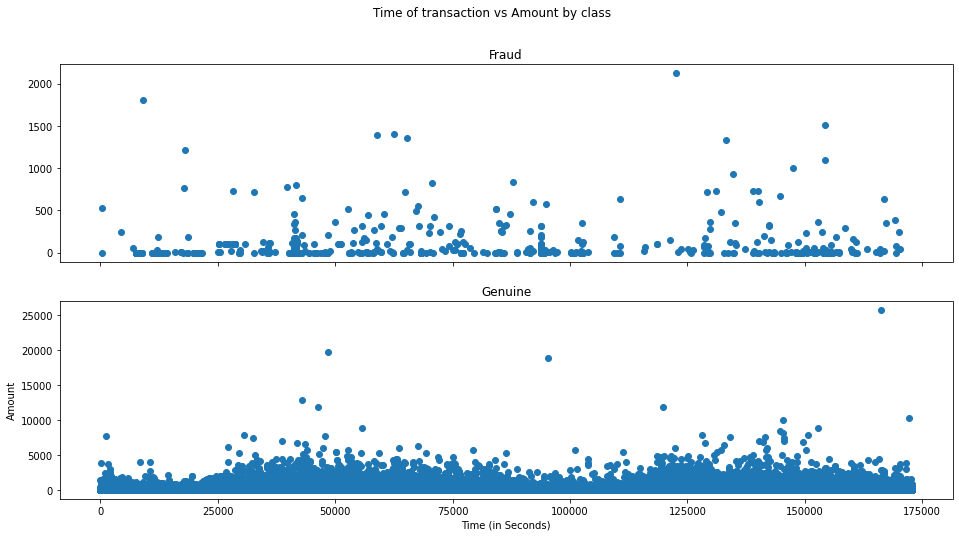

In [18]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('İşlem zamanı ve sınıfa göre tutar')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Dolandırıcılık Verileri')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Gerçek Veriler')
plt.xlabel('Zaman (saniye)')
plt.ylabel('Miktar')
plt.show()


**MODELLERİMİZE BAKALIM:**

In [20]:
from sklearn.model_selection import train_test_split

**Model 1:**

In [21]:
X=data.drop(['Class'],axis=1)

In [22]:
y=data['Class']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc=RandomForestClassifier()

In [26]:
model=rfc.fit(X_train,y_train)

In [27]:
prediction=model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,prediction)

0.9995786664794073

**Model 2:**

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
X1=data.drop(['Class'],axis=1)

In [32]:
y1=data['Class']

In [33]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=123)

In [34]:
lr=LogisticRegression()

In [35]:
model2=lr.fit(X1_train,y1_train)

In [36]:
prediction2=model2.predict(X1_test)

In [37]:
accuracy_score(y1_test,prediction2)

0.9988764439450862

**Model 3:**

In [ ]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In [ ]:
print('XGBoost modelinin doğruluk puanı {}'.format(accuracy_score(y_test, xgb_yhat)))


In [ ]:
print('XGBoost modelinin F1 puanı {}'.format(f1_score(y_test, xgb_yhat)))


In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
X2=data.drop(['Class'],axis=1)

In [40]:
y2=data['Class']

In [41]:
dt=DecisionTreeRegressor()

In [42]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=123)

In [43]:
model3=dt.fit(X2_train,y2_train)

In [44]:
prediction3=model3.predict(X2_test)

In [45]:
accuracy_score(y2_test,prediction3)

0.999133925541004

**SONUÇ**

In [ ]:
Görüyoruz ki kredi kartı dolandırıcılık tespitinde modellerimize göre %99,95 doğruluk elde ettik.